## Importing Required Libraries

In [1]:
from utils import *

## Loading Data

In [2]:
eigs19branches = np.load("_raw_data/19Branches_all_eigs.npy")

print(f"We have {eigs19branches.shape[0]} number of scenarios, \
each with {eigs19branches.shape[1]} eigenvalues")

We have 19815 number of scenarios, each with 49 eigenvalues


## Organize Data

In [4]:
# Create column labels
col_labels = []
for i in range(1, eigs19branches.shape[0] + 1):
    col_labels.append("Scenario {}".format(i))

#col_labels = ["Scenario {}".format(i) for i in range(1, eigs19branches.shape[0] + 1)]

In [5]:
df_eigenvalues = pd.DataFrame([], columns = col_labels)
df_eigenvalues.head()

,Scenario 1,Scenario 2,Scenario 3,Scenario 4,Scenario 5,Scenario 6,Scenario 7,Scenario 8,Scenario 9,Scenario 10,...,Scenario 19806,Scenario 19807,Scenario 19808,Scenario 19809,Scenario 19810,Scenario 19811,Scenario 19812,Scenario 19813,Scenario 19814,Scenario 19815


In [6]:
for sc in range(1, eigs19branches.shape[0] + 1):
    df_eigenvalues["Scenario {}".format(sc)] = eigs19branches[sc - 1][:]
    
with open("_preproc_data/df_eigenvalues.pkl", 'wb') as f:
    pickle.dump(df_eigenvalues, f, pickle.HIGHEST_PROTOCOL)

## Exploratory Data Analysis

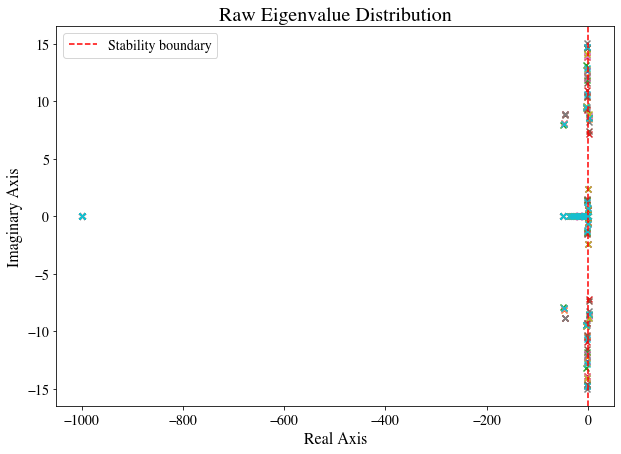

In [9]:
# Get a random sample of 10 scenarios (10 random numbers from 1 to 19185)
plot_scenarios = np.random.randint(1, df_eigenvalues.shape[1], 10)


# Plot the eigenvalues
fig, ax = plt.subplots(figsize = (10, 7))

for sc in plot_scenarios:
    real_part = np.real(df_eigenvalues[f"Scenario {sc}"][:]) 
    imag_part = np.imag(df_eigenvalues[f"Scenario {sc}"][:])
    
    # Plotting eigenvalues
    ax.scatter(real_part, imag_part, marker = 'x')

# Formatting axes
ax.set_title('Raw Eigenvalue Distribution', fontname = 'Times', fontsize = 20) # The font might not be available on other OSs
ax.set_xlabel('Real Axis', fontname = 'Times', fontsize = 16)
ax.set_ylabel('Imaginary Axis', fontname = 'Times', fontsize = 16)

# More formatting stuff
for tick in ax.get_xticklabels():
    tick.set_fontname('Times')
    tick.set_fontsize(14)
for tick in ax.get_yticklabels():
    tick.set_fontname('Times')
    tick.set_fontsize(14)
    
# Draw stability boundary
ax.axvline(x = 0, color = 'red', linestyle = '--', label = "Stability boundary")
ax.legend(prop = {'family' : 'Times', 'size' : 14})